In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer

In [1]:
from src.DataPreparation import fc, ffc

In [4]:
ffc.count_documents({})

1270

In [7]:
df = pd.DataFrame(list(ffc.find()))
df.head()

,_id,bio,followed_by,follows,id,is_business_account,is_joined_recently,is_private,num_posts,url
0,5c09710bbaead106a8cd66ab,,63.0,76.0,8882294111,False,False,False,2.0,https://www.instagram.com/lirlando
1,5c09710bbaead106a8cd66ad,Haters make me famous😻\n@irvan740 ❤,870.0,136.0,7422647242,True,False,False,3.0,https://www.instagram.com/ndah.endah.3701
2,5c09710bbaead106a8cd66c3,Viaggia... a modo tuo! #Mazzone #Travel,2100.0,700.0,4091271053,True,False,False,180.0,https://www.instagram.com/mazzoneviaggi
3,5c09710bbaead106a8cd66c4,,14.0,48.0,9418121438,False,True,False,0.0,https://www.instagram.com/chrismainahperre
4,5c09710bbaead106a8cd66d0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/lass.chuletitasss.papa


In [11]:
df_dropped = df.dropna()

In [17]:
df_dropped['is_business_account'] = df_dropped['is_business_account'].astype(int)
df_dropped['is_joined_recently'] = df_dropped['is_joined_recently'].astype(int)
df_dropped['is_private'] = df_dropped['is_private'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [18]:
df_dropped

,_id,bio,followed_by,follows,id,is_business_account,is_joined_recently,is_private,num_posts,url
0,5c09710bbaead106a8cd66ab,,63.0,76.0,8882294111,0,0,0,2.0,https://www.instagram.com/lirlando
1,5c09710bbaead106a8cd66ad,Haters make me famous😻\n@irvan740 ❤,870.0,136.0,7422647242,1,0,0,3.0,https://www.instagram.com/ndah.endah.3701
2,5c09710bbaead106a8cd66c3,Viaggia... a modo tuo! #Mazzone #Travel,2100.0,700.0,4091271053,1,0,0,180.0,https://www.instagram.com/mazzoneviaggi
3,5c09710bbaead106a8cd66c4,,14.0,48.0,9418121438,0,1,0,0.0,https://www.instagram.com/chrismainahperre
6,5c09710cbaead106a8cd66e5,@kha10lid_n,306.0,441.0,7311336467,0,0,1,21.0,https://www.instagram.com/khalid_malkk
8,5c09710cbaead106a8cd670b,په يجى فه رمى رؤژى نوى🕋\n•___/\___الله🕋❤️الله_...,1402.0,3589.0,2005449908,1,0,0,10.0,https://www.instagram.com/rozhy__musl__manakan
9,5c09710dbaead106a8cd6723,Penikmat kata,175.0,38.0,5501471574,1,0,0,9.0,https://www.instagram.com/srikandi_cantik_
10,5c09710dbaead106a8cd672a,,0.0,8.0,4854633336,0,0,1,0.0,https://www.instagram.com/lem0ns33
11,5c09710dbaead106a8cd672c,#onlinepsikolog #psychologist\nÇalışma Alanlar...,319.0,131.0,7664020580,0,0,0,51.0,https://www.instagram.com/terapigunu
13,5c09710dbaead106a8cd674c,,42.0,52.0,9418832835,0,1,0,1.0,https://www.instagram.com/ng_fashionteam


In [24]:
X = df_dropped.iloc[:,[2,3,6,7,8]]

In [29]:
X.shape

(1195, 5)

In [25]:
X.head()

,followed_by,follows,is_joined_recently,is_private,num_posts
0,63.0,76.0,0,0,2.0
1,870.0,136.0,0,0,3.0
2,2100.0,700.0,0,0,180.0
3,14.0,48.0,1,0,0.0
6,306.0,441.0,0,1,21.0


In [26]:
y = df_dropped.iloc[:, 5]

In [28]:
y.shape

(1195,)

### train-test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((896, 5), (299, 5), (896,), (299,))

### Logistic Regression

In [36]:
model_logistic = LogisticRegression()

In [37]:
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_pred_logistic = model_logistic.predict_proba(X_test)[:,1]

In [54]:
log_loss_logistic = log_loss(y_test, y_pred_logistic)
log_loss_logistic

0.37651770929754313

In [53]:
cv_logloss = -cross_val_score(model_logistic, X, y, scoring = 'neg_log_loss', cv = 10).mean()
cv_logloss

0.38947245874868874

In [51]:
y_test_pred = pd.DataFrame({'actual':y_test,'prediction':y_pred_logistic})

# 'actual' == 0 means the account is actually not a business account, but y_pred high means 
# they are predicted to have high probability to be a business account
y_test_pred_filtered = y_test_pred[y_test_pred['actual']== 0]
y_test_pred_filtered[y_test_pred_filtered['prediction'] > 0.6]

,actual,prediction
904,0,0.606349
841,0,0.810497
924,0,0.659506
171,0,0.601773
972,0,0.623975


In [73]:
df_dropped.iloc[841, :]

_id                                             5c097111baead106a8cd6af0
bio                    Willkommen auf meiner Seite, ich möchte euch h...
followed_by                                                         1341
follows                                                              308
id                                                            8372784258
is_business_account                                                    0
is_joined_recently                                                     0
is_private                                                             0
num_posts                                                            174
url                                  https://www.instagram.com/calawolf_
Name: 908, dtype: object

### First Random Forest 

In [55]:
rf = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [58]:
y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [67]:
log_loss_rf = log_loss(y_test, y_pred_rf)
log_loss_rf

0.4891984183283729

In [66]:
cv_logloss_rf1 = -cross_val_score(rf, X, y, cv = 10, scoring = 'neg_log_loss').mean()
cv_logloss_rf1

0.4623725844477965

In [64]:
y_test_pred1 = pd.DataFrame({'actual':y_test,'prediction':y_pred_rf})
y_test_pred_filtered1 = y_test_pred1[y_test_pred1['actual']== 0]
y_test_pred_filtered1[y_test_pred_filtered1['prediction'] > 0.8]

,actual,prediction
751,0,0.93
1091,0,0.85
427,0,0.81


### Best Random Forest

In [68]:
random_forest_grid = {'max_depth': [3, 4, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [40, 80, 100, 120, 140, 160],
                      'random_state': [359]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_log_loss')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 497 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 847 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1297 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1847 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  3.6min finished


best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40, 'random_state': 359}


In [69]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=359, verbose=0, warm_start=False)

In [70]:
y_pred_best = best_rf_model.predict_proba(X_test)[:, 1]

In [72]:
y_test_pred2 = pd.DataFrame({'actual':y_test,'prediction':y_pred_best})
y_test_pred_filtered2 = y_test_pred2[y_test_pred2['actual']== 0]
y_test_pred_filtered2[y_test_pred_filtered2['prediction'] > 0.6]

,actual,prediction
797,0,0.609668
70,0,0.624877
458,0,0.618216
751,0,0.625778
841,0,0.683456
924,0,0.652648
171,0,0.644100
972,0,0.610792
427,0,0.619473


In [75]:
log_loss_rf = log_loss(y_test, y_pred_best)
log_loss_rf

0.34907302064162815

In [74]:
cv_logloss_rf2 = -cross_val_score(best_rf_model, X, y, cv = 10, scoring = 'neg_log_loss').mean()
cv_logloss_rf2

0.349864018948076

### Model Evaluation

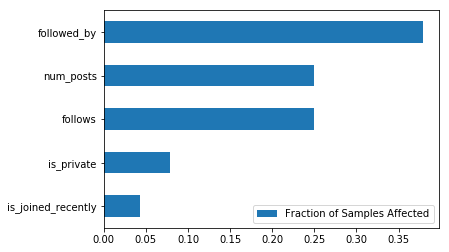

In [78]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

(array([147.,   8.,  34.,   4.,   0.,  17.,  18.,  11.]),
 array([0.        , 0.085432  , 0.170864  , 0.25629601, 0.34172801,
        0.42716001, 0.51259201, 0.59802401, 0.68345601]),
 <a list of 8 Patch objects>)

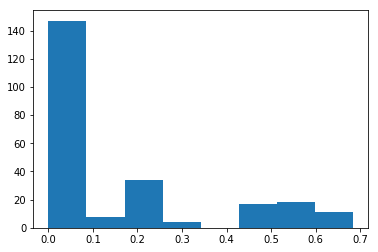

In [81]:
plt.hist(y_test_pred2[y_test_pred2['actual']== 0]['prediction'], bins = 8)

In [84]:
roc_auc_score(y_test, y_pred_best)

0.867050209205021

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

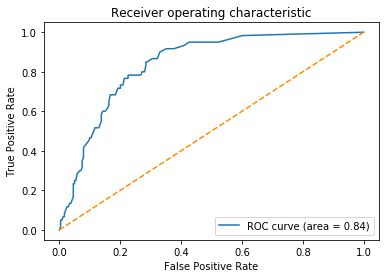

In [86]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_rf))
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")